In [1]:
import numpy as np

# 오늘의 주식과 본드 가격
S0 = 10
B0 = 10
print(S0,B0)

# 마켓가격 벡터
M0 = np.array((S0,B0))
print(M0)

10 10
[10 10]


In [2]:
# 내일은 주식과 본드가격 페이오프
S1 = np.array((20,5))
B1 = np.array((11,11))
print(S1, B1)

# 마켓 페이오프 매트릭스
M1 = np.array((S1,B1)).T
print(M1)

[20  5] [11 11]
[[20 11]
 [ 5 11]]


In [3]:
# 베르누이 효용함수
def u(x):
  return np.sqrt(x)

# 서로 다른 가중치를 가진 두 포트폴리오
phi_A = np.array((0.75, 0.25))
phi_D = np.array((0.25, 0.75))

# 두 포트폴리오를 만드는 비용은 같음
np.dot(M0, phi_A) == np.dot(M0, phi_D)

np.True_

In [4]:
# 포트폴리오 A의 페이오프
A1 = np.dot(M1, phi_A)
print(A1)

# 포트폴리오 D의 페이오프
D1 = np.dot(M1, phi_D)
print(D1)

[17.75  6.5 ]
[13.25  9.5 ]


In [5]:
# 확률측도
P = np.array((0.5, 0.5))

# 기대효용함수
def EUT(x):
  return np.dot(P, u(x))

In [6]:
# D1``두 ``D1``페이오프의 효용치
print(EUT(A1))
print(EUT(D1))

3.381292321692286
3.3611309730623735


In [7]:
from scipy.optimize import minimize

# 고정된 예산
w = 10

# minimize 함수에 넣을 제한 조건
cons = {'type':'eq', 'fun': lambda phi: np.dot(M0,phi) - w}

# 포트폴리오에 대해 정의한 기대효용함수
def EUT_(phi):
  x = np.dot(M1, phi)
  return EUT(x)


opt = minimize(lambda phi: -EUT_(phi), # EUT_(phi)를 최대화하기 위해 -EUT(phi) 최소화
               x0 = phi_A, # 초기값
               constraints=cons) # 예산 제한 조건

# x값과 최적 포트폴리오를 포함한 최적화결과
max_phi = opt.x
print(max_phi)

opt_ = EUT_(opt['x']) # 예산 w=10에 대한 최적(최고) 기대효용
print(opt_)

[0.61122474 0.38877526]
3.385015999493397


In [8]:
"""포트폴리오 통계"""
rS = S1 / S0 - 1 # 위험자산의 수익률 벡터
print(rS)

rB = B1 / B0 - 1 # 안전자산의 수익률 벡터
print(rB)

# 기대수익률함수
def mu(rX):
  return np.dot(P, rX)

print("기대확률:", P)
print("위험자산 ",rS,"의 기대수익률:", mu(rS)) # 위험자산의 수익률 벡터
print("무위험자산 ",rB,"의 기대수익률:", mu(rB)) # 무위험자산의 수익률 벡터

rM = M1 / M0 - 1 # 수익률행렬
print("수익률행렬\n:",rM)

print("기대수익률벡터", mu(rM)) # 기대 수익률 벡터

[ 1.  -0.5]
[0.1 0.1]
기대확률: [0.5 0.5]
위험자산  [ 1.  -0.5] 의 기대수익률: 0.25
무위험자산  [0.1 0.1] 의 기대수익률: 0.10000000000000009
수익률행렬
: [[ 1.   0.1]
 [-0.5  0.1]]
기대수익률벡터 [0.25 0.1 ]


In [9]:
""" 분산, 변동성, 공분산 행렬을 구한다. """

def var(rX): # 분산 함수
  return ((rX - mu(rX)) ** 2).mean()

print("기대수익률", rS, "의 분산: ", var(rS))
print("기대수익률", rB, "의 분산: ", var(rB))


def sigma(rX): # 변동성 함수
  return np.sqrt(var(rX))

print("기대수익률", rS, "의 변동성: ", sigma(rS))
print("기대수익률", rB, "의 변동성: ", sigma(rB))

cov = np.cov(rM.T, aweights=P, ddof=0) # 공분산 행렬
print("기대수익률벡터의 공분산", cov)

기대수익률 [ 1.  -0.5] 의 분산:  0.5625
기대수익률 [0.1 0.1] 의 분산:  0.0
기대수익률 [ 1.  -0.5] 의 변동성:  0.75
기대수익률 [0.1 0.1] 의 변동성:  0.0
기대수익률벡터의 공분산 [[0.5625 0.    ]
 [0.     0.    ]]


In [10]:
"""모든 가중치가 같은 포트폴리오의 기대 수익률, 분산, 변동성 구하기"""

phi = np.array((0.5, 0.5))

# 포트폴리오의 기대수익률
def mu_phi(phi):
   return np.dot(phi, mu(rM)) # 포트폴리오 x 기대수익률

print(mu_phi(phi))

# 포트폴리오 분산
def var_phi(phi):
  cv = np.cov(rM.T, aweights=P, ddof=0) #
  return np.dot(phi, np.dot(cv, phi))

print(var_phi(phi))

# 포트폴리오 변동성
def sigma_phi(phi):
    return var_phi(phi) ** 0.5

print(sigma_phi(phi))


0.17500000000000004
0.140625
0.375


Text(0, 0.5, 'expected return')

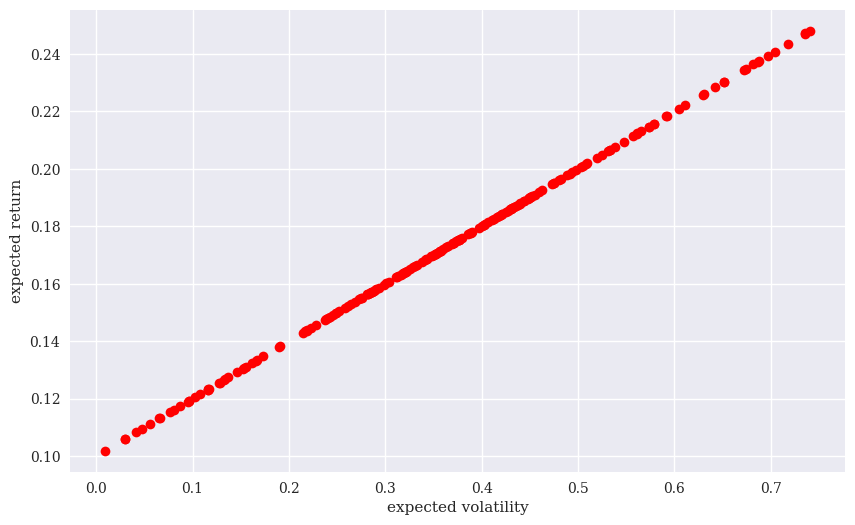

In [11]:
"""위험 자산 1개, 무위험 자산 1개로 구성된 포트폴리오는 기회집합이 직선이 된다."""

from pylab import plt, mpl
plt.style.use("seaborn-v0_8")
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["font.family"] = "serif"

phi_mcs = np.random.random((2,200)) # 200개의 무작위 포트폴리오
phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T # 포트폴리오 가중치의 합은 1
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs]) # 무작위 포트폴리오들에 대한 기대 수익률과 변동성

plt.figure(figsize=(10,6))
plt.plot(mcs[:,0], mcs[:,1], "ro")
plt.xlabel("expected volatility")
plt.ylabel("expected return")

Text(0, 0.5, 'expected return')

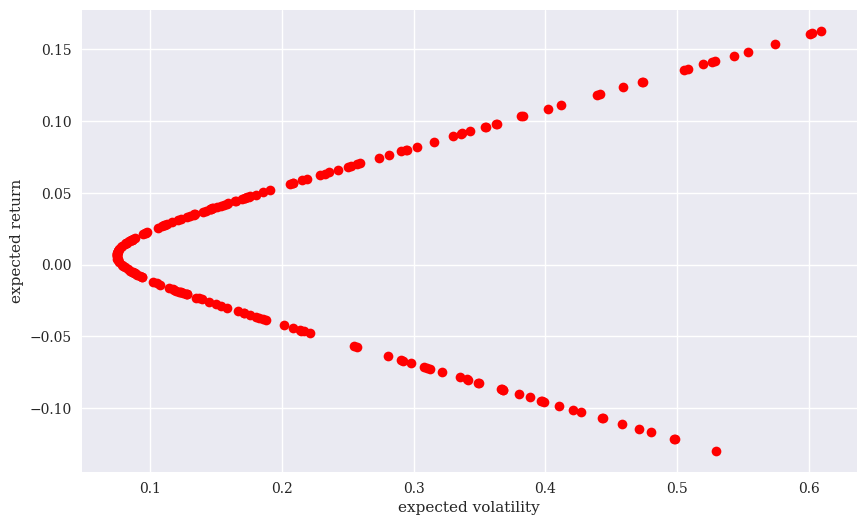

In [12]:
"""두개의 위험자산이 있는 기회집합은 총알형 그래프가 된다."""
P = np.ones(3) / 3 # 세 자산에 대한 확률측도

T0 = 10 # 자산 초기 가격

# 자산의 페이오프
S1 = np.array((20,10,5))
T1 = np.array((1,12,13))

M0 = np.array((S0,T0)) # 초기 자산 가격
M1 = np.array((S1,T1)).T # 자산 페이오프 행렬

rM = M1 / M0 - 1 # 자산 페이오프의 수익률 행렬

mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs]) # 무작위 포트폴리오들에 대한 기대 수익률과 변동성

plt.figure(figsize=(10,6))
plt.plot(mcs[:,0], mcs[:,1], "ro")
plt.xlabel("expected volatility")
plt.ylabel("expected return")

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.07481322946903253
       x: [ 4.651e-01  5.349e-01]
     nit: 4
     jac: [ 7.427e-02  7.529e-02]
    nfev: 13
    njev: 4
최소 변동성 포트폴리오: [0.46511697 0.53488303]
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.27216540990230487
       x: [ 6.673e-01  3.327e-01]
     nit: 9
     jac: [ 1.205e-04 -2.417e-04]
    nfev: 29
    njev: 9
최대 샤프비율 포트폴리오: [0.66731114 0.33268886]


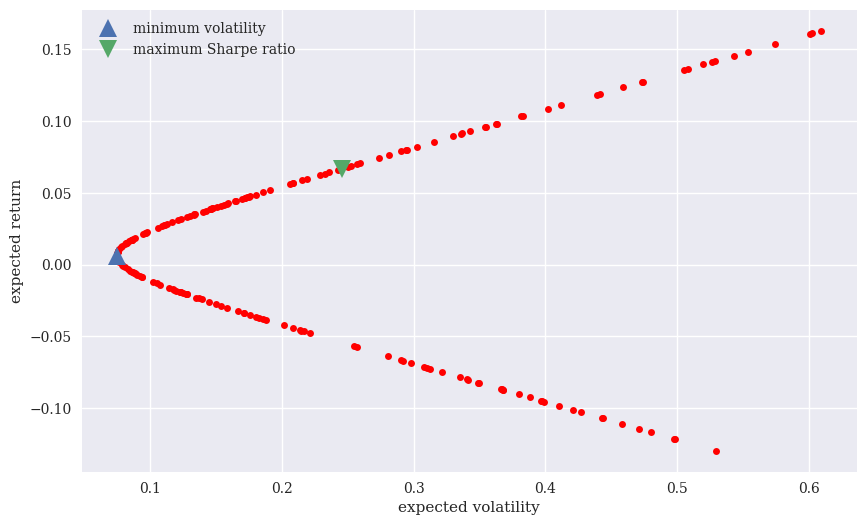

In [13]:
""" 최소 변동성 및 최대 샤프비율 """

cons = {"type":"eq", "fun": lambda phi: np.sum(phi) - 1}
bnds = ((0,1),(0,1)) 

min_var = minimize(sigma_phi, (0.5,0.5), constraints=cons, bounds=bnds)
print(min_var)
print("최소 변동성 포트폴리오:", min_var.x)

# 샤프비율함수를 정의
def sharpe(phi):
    return mu_phi(phi) / sigma_phi(phi)

max_sharpe = minimize(lambda phi: -sharpe(phi), (0.5,0.5), constraints=cons, bounds=bnds)
print(max_sharpe)
print("최대 샤프비율 포트폴리오:", max_sharpe.x)

plt.figure(figsize=(10,6))
plt.plot(mcs[:,0], mcs[:,1], "ro", ms=5)
plt.plot(sigma_phi(min_var["x"]), mu_phi(min_var["x"]), "^", ms=12.5, label="minimum volatility")
plt.plot(sigma_phi(max_sharpe["x"]), mu_phi(max_sharpe["x"]), "v", ms=12.5, label="maximum Sharpe ratio")
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.legend()

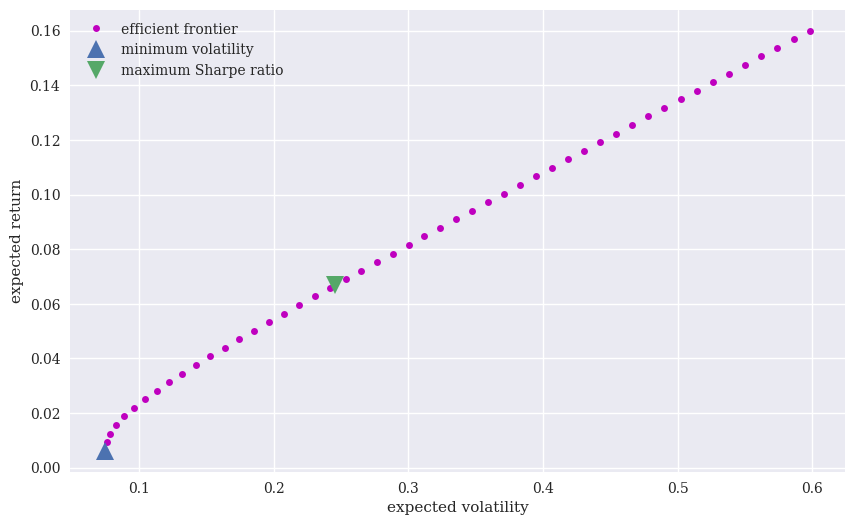

In [14]:
""" 효율적 투자 경계선 """
""" 최소 위험 포트폴리오보다 낮은 기대 수익률을 보이는 모든 포트폴리오는 비효율적이다. """

# 제한 조건으로 기대 수익률 목표값 설정
con = [{"type":"eq", "fun": lambda phi: np.sum(phi) - 1},
       {"type":"eq", "fun": lambda phi: mu_phi(phi) - target}]

bnds = ((0,1), (0,1))

# 목표 기대 수익률 집합을 생성
targets = np.linspace(mu_phi(min_var["x"]), 0.16)

# 효율적 투자 경계선
frontier = []

for target in targets:
    # 주어긴 기대 수익률에 대해 가장 변동성이 작은 포트폴리오 선택
    phi_eff = minimize(sigma_phi, (0.5,0.5), constraints=con, bounds=bnds)["x"]
    frontier.append((sigma_phi(phi_eff), mu_phi(phi_eff)))

frontier = np.array(frontier)

plt.figure(figsize=(10,6))
plt.plot(frontier[:,0], frontier[:,1], "mo", ms=5, label="efficient frontier")
plt.plot(sigma_phi(min_var["x"]), mu_phi(min_var["x"]),
         "^", ms=12.5, label="minimum volatility")
plt.plot(sigma_phi(max_sharpe["x"]), mu_phi(max_sharpe["x"]),
         "v", ms=12.5, label="maximum Sharpe ratio")
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.legend()

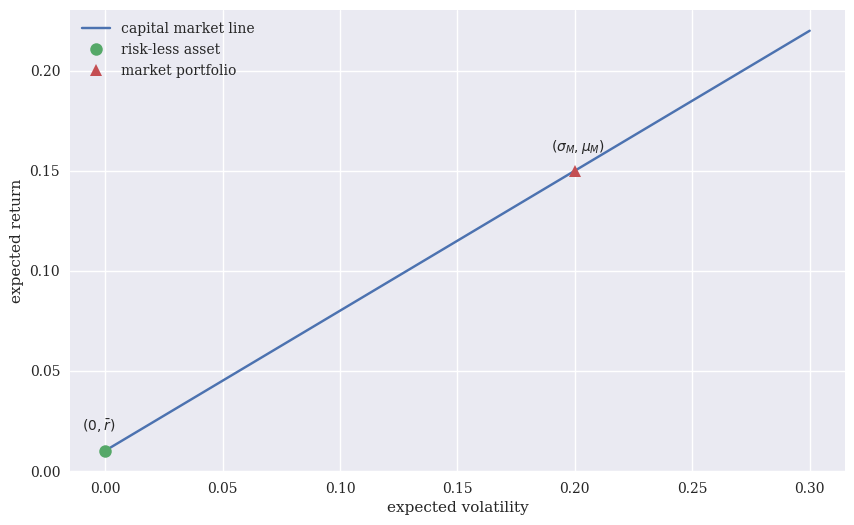

In [15]:
""" 무위험 자산과 시장포트폴리오의 조합인 포트폴리오의 집합을 나타내는 자본 시장선 """

plt.figure(figsize=(10,6))
plt.plot((0,0.3), (0.01, 0.22), label="capital market line")
plt.plot(0, 0.01, "o", ms=9, label="risk-less asset")
plt.plot(0.2, 0.15, "^", ms=9, label="market portfolio")
plt.annotate("$(0, \\bar{r})$", (0,0.01), (-0.01,0.02))
plt.annotate("$(\\sigma_M, \\mu_M)$", (0.2,0.15), (0.19,0.16))
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.legend()

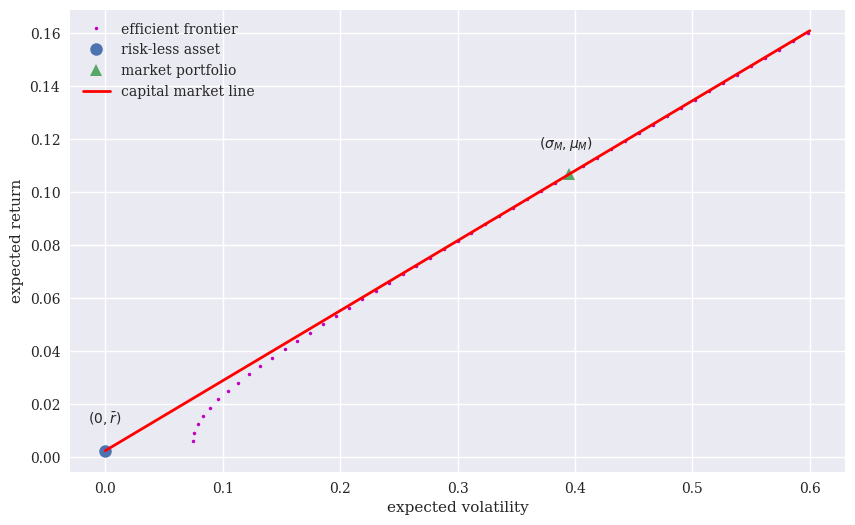

In [16]:
phi_M = np.array((0.8, 0.2))
mu_M = mu_phi(phi_M)
sigma_M = sigma_phi(phi_M)
r = 0.0025 # 무위험 자산의 기대 수익률
plt.figure(figsize=(10,6))
plt.plot(frontier[:,0], frontier[:,1], "m.", ms=5, label="efficient frontier")
plt.plot(0, r, "o", ms=9, label="risk-less asset")
plt.plot(sigma_M, mu_M, "^", ms=9, label="market portfolio")
plt.plot((0, 0.6), (r, r+((mu_M - r) / sigma_M) * 0.6), "r", label="capital market line", lw=2.0)
plt.annotate("$(0, \\bar{r})$", (0,r), (-0.015, r+0.01))
plt.annotate("$(\\sigma_M, \\mu_M)$", (sigma_M, mu_M), (sigma_M-0.025, mu_M+0.01))
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.legend()


In [17]:
# 리스크-수익률 공간상의 효용함수
def U(p):
    mu, sigma = p
    return mu - 1 / 2 * (sigma ** 2 + mu **2)

# 포트폴리오가 자본시장선에 있을 조건
cons = {"type": "eq",
        "fun" : lambda p: p[0] - (r + (mu_M - r) / sigma_M * p[1])}

opt = minimize(lambda p: -U(p), (0.1, 0.3), constraints=cons)
display(opt)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.034885186826739426
       x: [ 6.744e-02  2.461e-01]
     nit: 2
     jac: [-9.326e-01  2.461e-01]
    nfev: 6
    njev: 2

        _________________________     _________________________     
       /    2      2                 /    2      2                  
 1 - \/  - b *sigma  - 2*b*v + 1   \/  - b *sigma  - 2*b*v + 1  + 1 
[--------------------------------, --------------------------------]
                b                                 b                 

       ______________
      /            2 
1 - \/  0.8 - sigma  

       _______________
      /             2 
1 - \/  0.75 - sigma  

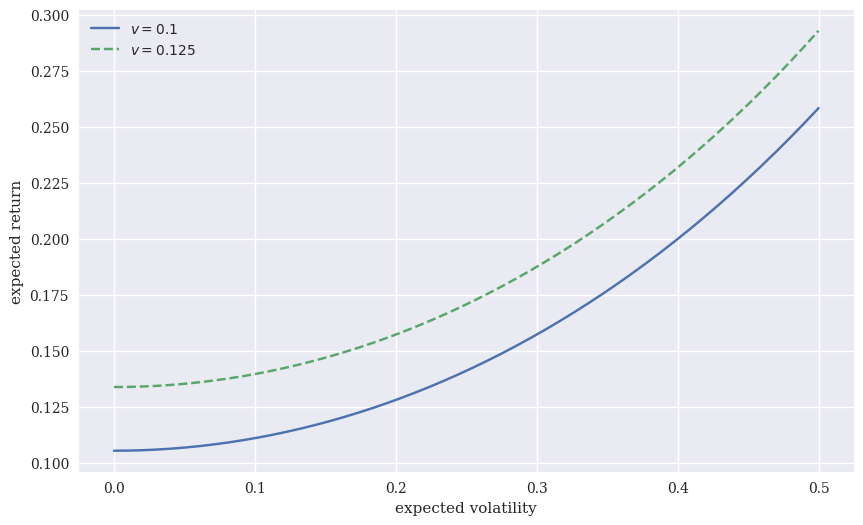

In [18]:
from sympy import *

init_printing(use_unicode=False, use_latex=False)
mu, sigma, b, v = symbols("mu sigma b v") # SymPy 심볼 정의

# mu 에 대한 효용함수 구하기
sol = solve("mu - b / 2 * (sigma ** 2 + mu ** 2) - v", mu) 
display(sol)

# b, v에 수칫값 대입
u1 = sol[0].subs({"b":1, "v":0.1})
display(u1)

u2 = sol[0].subs({"b":1, "v":0.125})
display(u2)

# 호출 가능 함수 생성
f1 = lambdify(sigma, u1)
f2 = lambdify(sigma, u2)

# 함수를 호출할 시그마값 지정하기
sigma_ = np.linspace(0.0, 0.5)

# 두가지 다른 효용 수준에 대해 함수 호출
u1_ = f1(sigma_)
u2_ = f2(sigma_)

plt.figure(figsize=(10,6))
plt.plot(sigma_, u1_, label="$v=0.1$")
plt.plot(sigma_, u2_, "--", label="$v=0.125$")
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.legend()

       ____________________________
      /                          2 
1 - \/  0.930229626346521 - sigma  

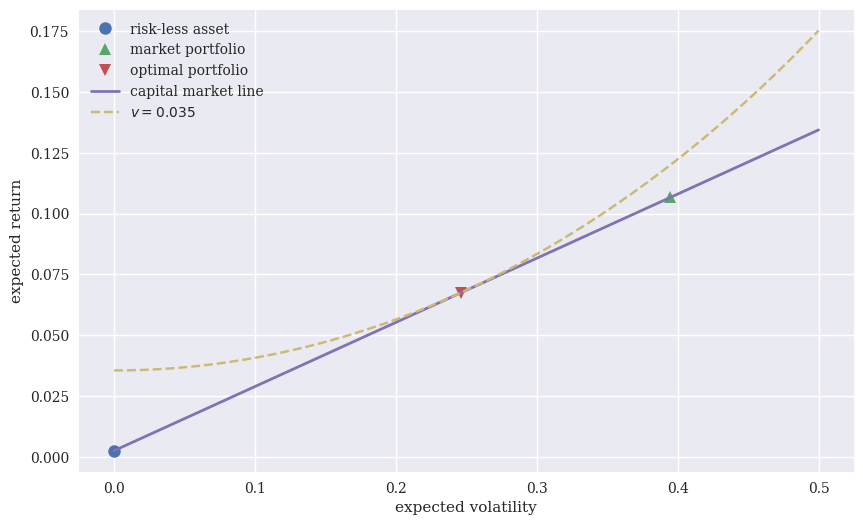

In [19]:
""" 무차별 곡선을 자본시장선과 결합하여 투자자의 최적 포트폴리오가 무엇인지 시작적으로 파악하자. """

# 최적효용함수에 대한 무차별 곡선의 정의
u = sol[0].subs({"b":1, "v": -opt["fun"]})
display(u)

# 무차별 곡선을 그리기 위한 수칫값 계산
f = lambdify(sigma, u)
u_ = f(sigma_)

plt.figure(figsize=(10,6))
plt.plot(0, r, "o", ms=9, label="risk-less asset")
plt.plot(sigma_M, mu_M, "^", ms=9, label="market portfolio")
plt.plot(opt["x"][1], opt["x"][0], "v", ms=9, label="optimal portfolio")
plt.plot((0, 0.5), (r, r + (mu_M - r) / sigma_M * 0.5), label="capital market line", lw=2.0)
plt.plot(sigma_, u_, "--", label="$v={}$".format(-round(opt["fun"], 3)))
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.legend()

- 무차익거래 가격(No-Arbitrage Price)은 차익거래(Arbitrage)가 불가능한 상태에서 형성되는 가격
- 최적 회귀 인숫값(Optimal Regression Coefficients)은 회귀 모델을 최적으로 학습시킨 후 얻어지는 계수. 즉, 주어진 데이터에 대해 오차를 최소화하면서 변수 간의 관계를 가장 잘 설명하는 값
- 회계계수를 계산하는 의미: 시장 페이오프(M1)라는 변수들을 사용하여 V1의 페이오프를 가장 잘 설명하는 계수를 찾는것.
- 회귀계수(Factor Loading): M1의 각 요소가 V1의 페이오프에 미치는 영향력을 수치로 표현한 값
- 무차익거래 가격(Arbitrage-Free Price)은 차익거래(arbitrage)의 기회를 제공하지 않는 공정한 가격
- V0는 현재 시장에서 관찰된 자산 V의 실제 가격이 아니라, 차익거래 가격결정 이론(APT)을 기반으로 계산된 무차익거래 가격을 의미합니다. 
  - 즉, V0는 시장 요인과 회귀계수(Factor Loading)를 고려하여 이론적으로 자산 V가 공정하게 평가될 것으로 예상되는 가격을 계산한 값이에요. 
  - 현실에서는 시장의 비효율성이나 기타 외부 요인(수급, 투자 심리 등) 때문에 실제 시장 가격과 V0가 차이가 날 수 있어요.


In [ ]:
""" 두개의 리스크 요인으로 페이오프 V1를 설명하는 예. 오차가 발생한다. """
""" arbitrage pricing theory (APT) """
""" 차익거래 가격결정 이론은 동적인 모델이지만, 정적인 모델로도 설명할 수 있다. """
print("market price:", M0)
print("market pay off:", M1)

V1 = np.array((12, 15, 7)) # 세 번째 자산의 페이오프
reg = np.linalg.lstsq(M1, V1, rcond=-1)[0] # 최적 회귀 인숫값을 요인적재량(Factor Loading)으로 해석할 수 있다.
print("factor loading:", reg)

print("predicted V1:", np.dot(M1, reg)) # M1 행렬과 요인적재량 reg의 내적을 통해 예측된 자산 V1의 값
print("residual:", np.dot(M1, reg) - V1) # 두 요인만으로는 페이오프 V1을 설명할수 없으므로
                                         # 자산 복제는 완벽하지 못하고 residual이 남는다.
V0 = np.dot(M0, reg) # Factor Loading을 이용하여 자산 V에 대한 무차익거래 가격 V0을 추정할 수 있다.
print(V0)

market price: [10 10]
market pay off: [[20  1]
 [10 12]
 [ 5 13]]
factor loading: [0.6141665  0.50030531]
predicted V1: [12.78363525 12.14532872  9.57480155]
residual: [ 0.78363525 -2.85467128  2.57480155]
11.144718094850402
